# AI Comparisons

This notebook is for comparing the different AI's by letting them compete against each other. 

In [ ]:
%run Core.ipynb

The function *empty_caches()* empties all exisiting caches from the Core notebook.

In [ ]:
def empty_caches():
    global Cache
    Cache = {}
    global gCache
    gCache = {}
    global Cache_test
    Cache_test = {}
    global Cache_eval
    Cache_eval = {}

### Function: compare_AIs
The function *compare_AIs* takes two AI's as arguments. Then 50 games are played where each player is beginning 25 times. For each game the seeds are changed to generate different games. At the end the result is printed out that shows how many times each AI has won. 

In [ ]:
def compare_AIs(AI_1, AI_2):
    empty_caches()

    ai1 = 0
    ai2 = 0

    for seed in range(25):
        rn.seed(seed)

        game1 = Kalah_Game([AI_1, AI_2],0)
        game1.start()
        won1 = utility(game1.state, 0)
        
        if(won1 == 1):
            ai1 += 1
        elif(won1 == -1):
            ai2 += 1
        else:
            pass
            
        ############################
        
        rn.seed(seed)

        game2 = Kalah_Game([AI_2, AI_1],0)
        game2.start()
        won2 = utility(game2.state, 0)

        if(won2 == 1):
            ai2 += 1
        elif(won2 == -1):
            ai1 += 1
        else:
            pass

    print(str(AI_1.name) + f" won {ai1} times, " + str(AI_2) + f" won {ai2} times and {50-ai1-ai2} games ended as draws.")

## Tests Minimax 

In this section we are executing the following tests:

- Random AI plays against Minimax AI
- Two Minimax AI's play against each other with same and different limits

#### Test: Random_AI vs. Minimax

In this test the Random AI and the Minimax AI are playing against each other.

In [ ]:
compare_AIs(Random_AI("Rando", 1), Minimax("Minimax", 2))

Rando won 0 times, Minimax won 50 times and 0 games ended as draws.


As expected the Minimax AI wins every time. 

#### Test: Minimax vs. Minimax 

In this test two Minimax AI's play against each other with the same limit of 3.

In [ ]:
compare_AIs(Minimax("Mima_1", 3), Minimax("Mima_2", 3))

Mima_1 won 25 times, Mima_2 won 25 times and 0 games ended as draws.


As expected each player wins 25 times. When two AI's with the same limit play against each other the player who is beginning wins. 

In the following two tests two Minimax AI's with different limits are competing.

In [ ]:
compare_AIs(Minimax("Mima_4", 4), Minimax("Mima_3", 3))

Mima_4 won 29 times, Mima_3 won 20 times and 1 games ended as draws.


The Minimax AI with limit 4 wins roughly 10 times more than the Minimax AI with limit 3.

In [ ]:
compare_AIs(Minimax("Mima_5", 5), Minimax("Mima_3", 3))

Mima_5 won 39 times, Mima_3 won 6 times and 5 games ended as draws.


The Minimax AI with limit 5 has a win rate of roughly 80% when it's playing against a Minimax AI with limit 3. As expected an AI with a higher limit wins more often than the same AI with a lower limit. 

## Tests: Alpha-Beta

In this section we are executing the following tests:

- two AlphaBeta AI's play against each other with same and different limits
- Minimax AI plays against AlphaBeta AI with same and different limits 

#### Test AlphaBeta vs. AlphaBeta

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_1", 3), AlphaBeta("AlphaBeta_2", 3))

AlphaBeta_1 won 25 times, AlphaBeta_2 won 25 times and 0 games ended as draws.


As expected each player wins 25 times. When two AI's with the same limit play against each other the player who is beginning wins. 

In the following two tests two AlphaBeta AI's with different limits are competing.

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_1", 4), AlphaBeta("AlphaBeta_2", 3))

AlphaBeta_1 won 29 times, AlphaBeta_2 won 20 times and 1 games ended as draws.


The AlphaBeta AI with limit 4 wins roughly 10 times more than the AlphaBeta AI with limit 3.

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_1", 5), AlphaBeta("AlphaBeta_2", 3))

AlphaBeta_1 won 39 times, AlphaBeta_2 won 6 times and 5 games ended as draws.


The AlphaBeta AI with limit 5 has a win rate of roughly 80% when it's playing against a AlphaBeta AI with limit 3. As expected an AI with a higher limit wins more often than the same AI with a lower limit. 

#### Test: Minimax vs. AlphaBeta

In this test the Minimax AI and the AlphaBeta AI are playing against each with the same limit of 3.

In [ ]:
compare_AIs(Minimax("Minimax", 3), AlphaBeta("AlphaBeta", 3))

Minimax won 25 times, AlphaBeta won 25 times and 0 games ended as draws.


With the same limit the beginning player wins independent from the algorithm. 

The two AI's Minimax and AlphaBeta are competing against each other with different limits. In the first test the Minimax AI has a higher limit by 1 than the AlphaBeta AI and in the second test it is reversed. In the third test the AlphaBeta AI has a limit advantage of 2. 

In [ ]:
compare_AIs(Minimax("Minimax", 4), AlphaBeta("AlphaBeta", 3))

Minimax won 29 times, AlphaBeta won 20 times and 1 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax", 3), AlphaBeta("AlphaBeta", 4))

Minimax won 20 times, AlphaBeta won 29 times and 1 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax", 3), AlphaBeta("AlphaBeta", 5))

Minimax won 6 times, AlphaBeta won 39 times and 5 games ended as draws.


The AI with the higher limit wins more often. Also the higher the difference between the limits is the AI with the higher limit wins more often. 

# Tests: Scout

In this section we are executing the following tests:

- Scout plays against Scout with same and different limits 
- Scout plays against Minimax with same and different limits 
- Scout plays against AlphaBeta with same and different limits 

#### Tests: Scout vs. Scout

In [ ]:
compare_AIs(Scout("Scout_1", 3), Scout("Scout_2", 3))

Scout_1 won 25 times, Scout_2 won 25 times and 0 games ended as draws.


As expected each player wins 25 times. When two AI's with the same limit play against each other the player who is beginning wins. 

In the following two tests two Scout AI's with different limits are competing.

In [ ]:
compare_AIs(Scout("Scout_1", 4), Scout("Scout_2", 3))

Scout_1 won 29 times, Scout_2 won 20 times and 1 games ended as draws.


The AlphaBeta AI with limit 4 wins roughly 10 times more than the AlphaBeta AI with limit 3.

In [ ]:
compare_AIs(Scout("Scout_1", 5), Scout("Scout_2", 3))

Scout_1 won 39 times, Scout_2 won 6 times and 5 games ended as draws.


The Scout AI with limit 5 has a win rate of roughly 80% when it's playing against a Scout AI with limit 3. As expected an AI with a higher limit wins more often than the same AI with a lower limit. 

#### Tests: Minimax and Scout

In this test the Minimax AI and the Scout AI are playing against each with the same limit of 3.

In [ ]:
compare_AIs(Minimax("Minimax", 3), Scout("Scout", 3))

Minimax won 25 times, Scout won 25 times and 0 games ended as draws.


With the same limit the beginning player wins independent from the algorithm. 

The two AI's Minimax and Scout are competing against each other with different limits. In the first test the Minimax AI has a higher limit than the Scout AI and in the second test it is reversed.

In [ ]:
compare_AIs(Minimax("Minimax", 4), Scout("Scout", 3))

Minimax won 29 times, Scout won 20 times and 1 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax", 3), Scout("Scout", 4))

Minimax won 20 times, Scout won 29 times and 1 games ended as draws.


The AI with the higher limit wins more often independent from the algorithm. 

#### Tests: AlphaBeta and Scout

In this test the AlphaBeta AI and the Scout AI are playing against each with the same limit of 3.

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta", 3), Scout("Scout", 3))

AlphaBeta won 25 times, Scout won 25 times and 0 games ended as draws.


With the same limit the beginning player wins independent from the algorithm. 

The two AI's AlphaBeta and Scout are competing against each other with different limits. In the first test the AlphaBeta AI has a higher limit than the Scout AI and in the second test it is reversed.

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta", 4), Scout("Scout", 3))

AlphaBeta won 29 times, Scout won 20 times and 1 games ended as draws.


In [ ]:
compare_AIs(AlphaBeta("AlphaBeta", 3), Scout("Scout", 4))

AlphaBeta won 20 times, Scout won 29 times and 1 games ended as draws.


The AI with the higher limit wins more often independent from the algorithm. 

# Conclusion

1. All tests between two AI's with the same limit show that always the beginner is winning. That is the result for the same algorithm competing and for different algorithms playing against each other.

2. The AI with the higher limit wins more often. When the differnce between the limits of the AI's gets bigger the win rate of the AI with the higher limit gets bigger. That is also the same result for all algorithms competing against each other. 

That shows that in general all three AI's have a similar level. The difference is located in the computing time and in the node inscpections. These factors are researched in the following tests.

# Time and Node Inspections comparison: Minimax, AlphaBeta, Scout

In this section we are comparing the efficencies of the three AI's:

- computation time for Minimax AI, AlphaBeta AI and Scout AI
- node inspections for Minimax AI, AlphaBeta AI and Scout AI

This efficiency of the AIs should be compared with and without memoization.

Memoization is a technique to speed up function calls of a certain complex function, by storing past inputs and corresponding outputs in a dictionary. If an input to the function was once recieved before, the execution of the actual function can be skipped and instead the output stored in the dictionary will be returned. This is mainly useful for functions that take longer to compute than it takes to access a value in a dictionary.

The comparison without memoization should be more representative of the algorithmical efficiency of the different AIs. The comparison with memoization on the other hand should demonstrate how effective the different memoization implementations for the different AIs are and which AI implementation is most useful in total.

The function *test_with_limit* receives a Player class and a limit and then plays five games with two players of this Player class which each are given the provided limit. By playing five games with different seeds, variations due to random choices of the AIs are evened.

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd

def test_with_limit(PlayerClass, limit):
    global gCounts
    gCounts = 0
    time = datetime.now()
    for seed in range(5):
        empty_caches()
        Kalah_Game([PlayerClass("Player_1",limit,seed),PlayerClass("Player_2",limit,seed)],0).start()
    time_diff = datetime.now() - time
    time_diff = float(time_diff.total_seconds())
    return time_diff

The following function *test_AIs* tests the three AIs one after another with different limits and saves the calculation times and node inspection counts to lists to illustrate them in diagrams afterwards.

In [ ]:
limits = [1,2,3,4,5]

In [ ]:
def test_AIs():
    global limits
    times = [[],[],[]]
    counts = [[],[],[]]

    for limit in limits:
        times[0].append(test_with_limit(Minimax, limit))
        counts[0].append(gCounts)

    for limit in limits:
        times[1].append(test_with_limit(AlphaBeta, limit))
        counts[1].append(gCounts)

    for limit in limits:
        times[2].append(test_with_limit(Scout, limit))
        counts[2].append(gCounts)

    return times, counts

The function *draw_plots()* displays the calculated time and node inspection count values in two diagrams make them comparable.

In [ ]:
def draw_plots(times, counts):
    global limits

    plt.title('Calculation time for 5 games of two identical player algorithms')
    plt.xlabel('Limit depth')
    plt.ylabel('Time in seconds')

    plt.plot(limits, times[0], label="Minimax")
    plt.plot(limits, times[1], label="AlphaBeta")
    plt.plot(limits, times[2], label="Scout")

    plt.legend(loc='upper left', frameon=True)

    # Diagramm anzeigen:
    plt.show()

    plt.title('Node Inspections for 5 games of two identical player algorithms')
    plt.xlabel('Limit depth')
    plt.ylabel('Node Inspections')

    plt.plot(limits, counts[0], label="Minimax")
    plt.plot(limits, counts[1], label="AlphaBeta")
    plt.plot(limits, counts[2], label="Scout")

    plt.legend(loc='upper left', frameon=True)

    # Diagramm anzeigen:
    plt.show()

## Comparison without Memoization
To test the AIs without memoization, the AI functions *value, evaluate, EVAL* and *TEST* from the core notebook are overwritten by special versions which were implemented specifically for this comparison and are marked by an '_' at the beginning of their names. 

In [ ]:
value = _value
evaluate = _evaluate
EVAL = _EVAL
TEST = _TEST

In [ ]:
times, counts = test_AIs()

In [ ]:
draw_plots(times, counts)

NameError: name 'plt' is not defined

## Comparison with Memoization
To compare the AIs without memoization, the core notebook is executed again to have the original versions of the core functions.

In [ ]:
%run Core.ipynb

In [ ]:
times, counts = test_AIs()

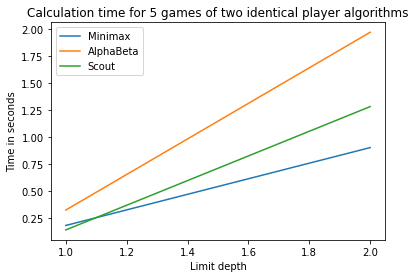

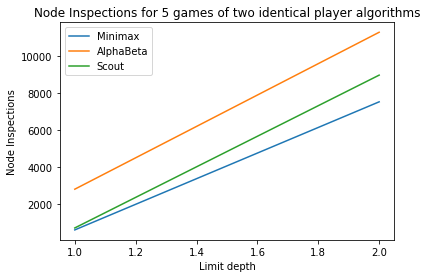

In [ ]:
draw_plots(times, counts)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b91c3ea7-d814-439b-837a-72fdc90697b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>